In [6]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X #

array([[1],
       [2],
       [3]])

In [7]:
# 二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2)
#接口transform直接调用
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [8]:
X_.shape

(3, 3)

In [9]:
#三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [10]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

In [42]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
#将X升维，准备好放入sklearn中
X = X.reshape(-1,1)
y

array([-6.54639413e-01,  3.23832143e-01,  1.01463893e+00, -1.04541922e-01,
       -9.54097511e-01, -7.61767511e-01,  2.19222347e-02,  6.37468193e-01,
        3.00653482e-01,  7.81237778e-01,  4.31286305e-02,  4.26174779e-01,
        7.34921650e-01, -8.16896281e-01, -9.10976357e-01, -6.23556402e-01,
       -1.15653261e+00,  3.87722577e-02, -5.27779796e-01, -1.43764744e+00,
        7.20568176e-01, -7.42673638e-01, -9.46371922e-01, -7.96824836e-01,
       -7.32328912e-01,  8.49964652e-01, -1.08763923e+00, -1.82122918e-01,
        4.72745679e-01, -2.73346296e-01,  1.23014210e+00, -8.60492039e-01,
       -4.21323537e-01,  4.08600304e-01, -2.98759618e-01,  9.52331322e-01,
       -9.01575520e-01,  1.55982485e-01,  8.29522626e-01, -2.50901995e-01,
       -7.78358506e-01, -4.18493846e-01,  3.99942125e-02,  8.83836261e-01,
       -7.28709177e-01,  5.24647761e-01, -4.36700367e-01, -3.47166298e-01,
        4.72226156e-01, -2.19059337e-01, -1.17373303e-02,  8.08035747e-01,
        5.16673582e-01,  

In [12]:
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
#对训练数据的拟合
LinearR.score(X,y)
#对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

In [39]:
#多项式拟合，设定高次项
d=5
#进行高此项转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = PF(degree=d).fit_transform(line)
#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)

0.7389689593597157

In [25]:
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

0.9868904451787978

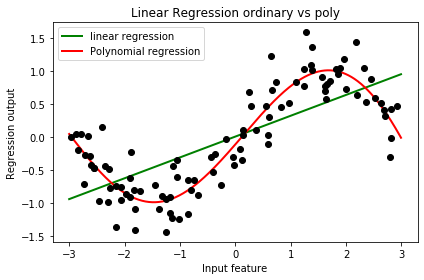

In [20]:
import matplotlib.pyplot as plt
d=5
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line)
#放置画布
fig, ax1 = plt.subplots(1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
,label="Polynomial regression")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

In [26]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [27]:
poly = PolynomialFeatures(degree=5).fit(X)

In [28]:
#重要接口get_feature_names
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [29]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

In [30]:
housevalue = fch()

In [31]:
X = pd.DataFrame(housevalue.data)

In [32]:
y = housevalue.target

In [33]:
housevalue.feature_names
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
poly = PolynomialFeatures(degree=2).fit(X,y)
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [34]:
X_ = poly.transform(X)
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大

In [35]:
reg = LinearRegression().fit(X_,y)

In [36]:
coef = reg.coef_
[*zip(poly.get_feature_names(X.columns),reg.coef_)]
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T
coeff.columns = ["feature","coef"]
coeff.sort_values(by="coef")

,feature,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.0871911
25,平均房间数目 平均卧室数目,-0.0689064


In [38]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6062326851998049

In [ ]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.7451090624007497
time:0.657240629196167
